# SVM On Predefined IRIS Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
type(iris_dataset)

sklearn.utils.Bunch

The iris object that is returned by load_iris is a Bunch object, which is very similar
to a dictionary. It contains keys and values

In [3]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
print(iris_dataset['DESCR'][:1000] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris_dataset['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
# The data itself is contained in the target and data fields. data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:
type(iris_dataset['data'])

numpy.ndarray

In [10]:
##The value of the key target_names is an array of strings, containing the species of flower that we want to predict
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
## The value of feature_names is a list of strings, giving the description of each feature
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
## Rows --> individual items are Samples
## Columns --> properties of items Features
## Shape --> Measurement which is number of samples X features
iris_dataset['data'].shape

(150, 4)

In [13]:
iris_dataset['target'].shape

(150,)

In [14]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df = pd.DataFrame(data=iris_dataset.data,columns=iris_dataset['feature_names'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [17]:
df['target'] = iris_dataset['target']

In [18]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [23]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df['Flower_Name'] = df.target.apply(lambda x:iris_dataset['target_names'][x])

In [27]:
df[['target','Flower_Name']].head()

,target,Flower_Name
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa


In [ ]:
# Create 3 dataframes for each targets for ease of plotting
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

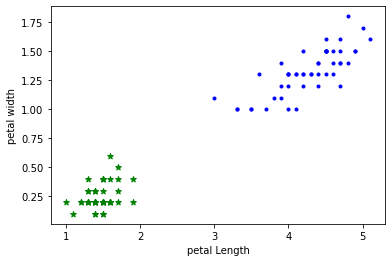

In [61]:
plt.xlabel("petal Length")
plt.ylabel("petal width")
plt.scatter(data=df0,x='petal length (cm)',y='petal width (cm)',color="green",marker="*")
plt.scatter(data=df1,x='petal length (cm)',y='petal width (cm)',color="blue",marker=".")

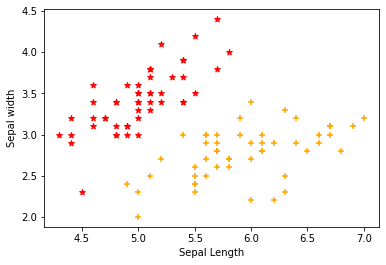

In [60]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.scatter(data=df0,x='sepal length (cm)',y='sepal width (cm)',color="red",marker="*")
plt.scatter(data=df1,x='sepal length (cm)',y='sepal width (cm)',color="orange",marker="+")

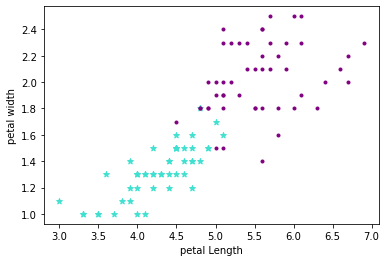

In [62]:
plt.xlabel("petal Length")
plt.ylabel("petal width")
plt.scatter(data=df1,x='petal length (cm)',y='petal width (cm)',color="turquoise",marker="*")
plt.scatter(data=df2,x='petal length (cm)',y='petal width (cm)',color="purple",marker=".")

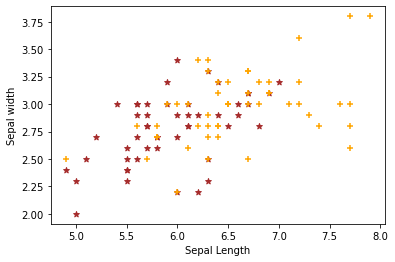

In [65]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.scatter(data=df1,x='sepal length (cm)',y='sepal width (cm)',color="brown",marker="*")
plt.scatter(data=df2,x='sepal length (cm)',y='sepal width (cm)',color="orange",marker="+")

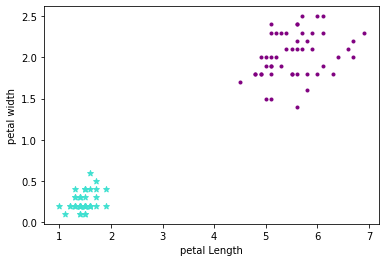

In [63]:
plt.xlabel("petal Length")
plt.ylabel("petal width")
plt.scatter(data=df0,x='petal length (cm)',y='petal width (cm)',color="turquoise",marker="*")
plt.scatter(data=df2,x='petal length (cm)',y='petal width (cm)',color="purple",marker=".")

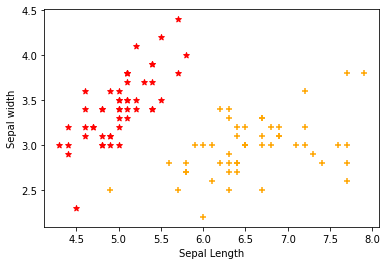

In [66]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.scatter(data=df0,x='sepal length (cm)',y='sepal width (cm)',color="red",marker="*")
plt.scatter(data=df2,x='sepal length (cm)',y='sepal width (cm)',color="orange",marker="+")

# Model Building and Evaluation

In [67]:
X = df.drop(['target','Flower_Name'],axis=1)

In [69]:
y = df['target']

In [82]:
# To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the random_state parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=3)

In [83]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [84]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [94]:
# Different values of C(regularisation, kernel and gamma set to auto)
from sklearn.svm import SVC
classifier = SVC(C=5,kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=5, kernel='linear', random_state=0)

In [95]:
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [96]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.9473684210526315
